In [2]:
# drive.flush_and_unmount()
# from google.colab import drive
# drive.mount('/content/gdrive')
# import os
# os.chdir("/content/gdrive/My Drive/cs498/Assignment4")

# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [3]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [4]:
from gan.train import train
from gan.utils import sample_noise, show_images, deprocess_img, preprocess_img
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


Extracting ./MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw


Extracting ./MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw


Extracting ./MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_data/MNIST/raw


Extracting ./MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_data/MNIST/raw
Processing...



Done!



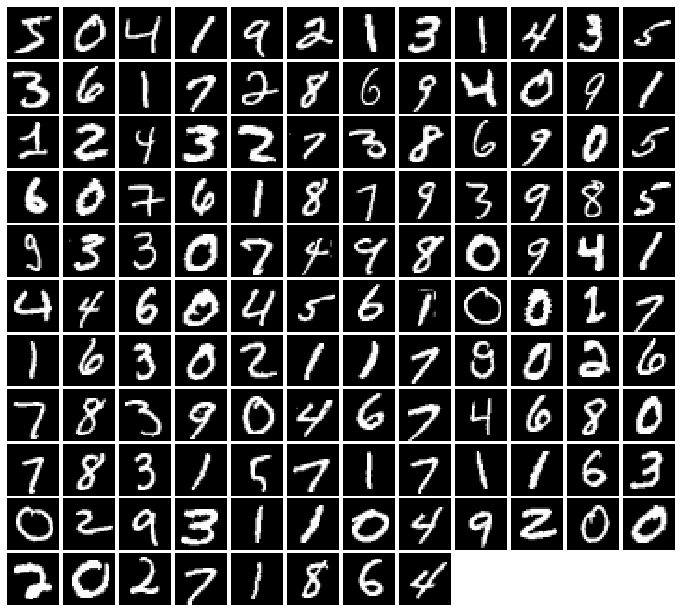

In [6]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)


imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()
show_images(imgs)

# Discriminator and Generator


In [7]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [8]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [9]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="files/gan_samples/mnist.jpg" width=500>

EPOCH:  1
Iter: 0, D: 1.339, G:0.681


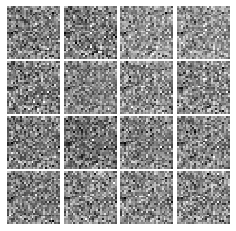


Iter: 250, D: 0.912, G:0.9449


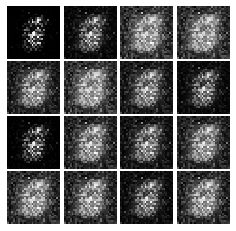


EPOCH:  2
Iter: 500, D: 1.04, G:1.504


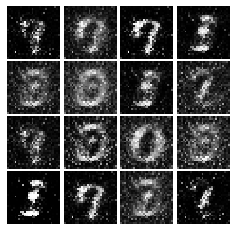


Iter: 750, D: 1.322, G:2.024


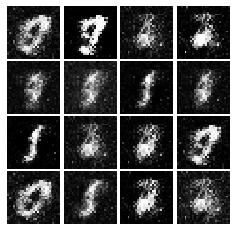


EPOCH:  3
Iter: 1000, D: 1.235, G:1.173


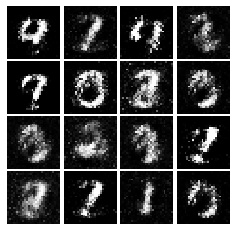


Iter: 1250, D: 1.076, G:0.9321


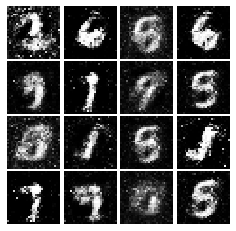


EPOCH:  4
Iter: 1500, D: 1.26, G:1.144


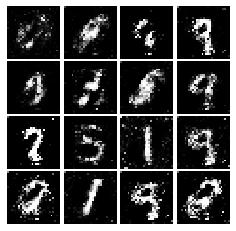


Iter: 1750, D: 1.17, G:1.048


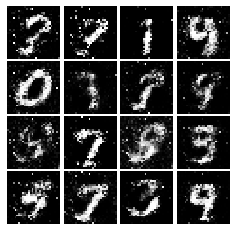


EPOCH:  5
Iter: 2000, D: 1.187, G:0.9798


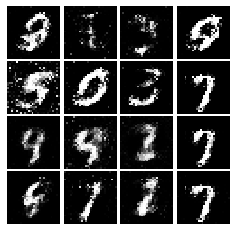


Iter: 2250, D: 1.143, G:1.166


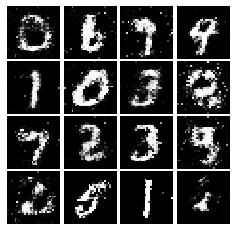


EPOCH:  6
Iter: 2500, D: 1.243, G:0.9446


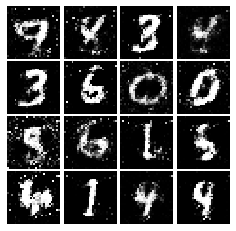


Iter: 2750, D: 1.246, G:0.8445


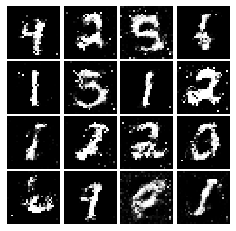


EPOCH:  7
Iter: 3000, D: 1.291, G:0.9911


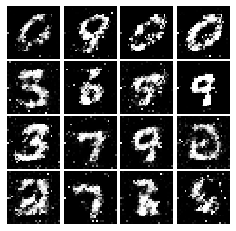


Iter: 3250, D: 1.201, G:0.926


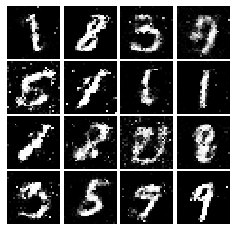


EPOCH:  8
Iter: 3500, D: 1.381, G:0.8719


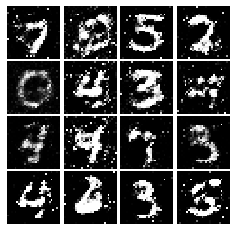


EPOCH:  9
Iter: 3750, D: 1.251, G:0.9549


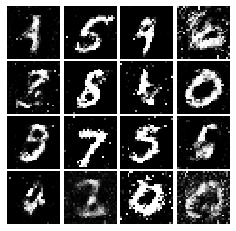


Iter: 4000, D: 1.477, G:0.8302


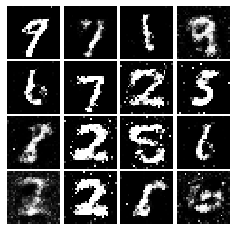


EPOCH:  10
Iter: 4250, D: 1.303, G:0.8925


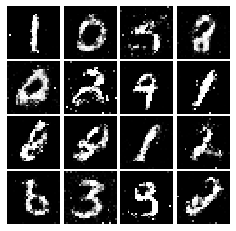


Iter: 4500, D: 1.347, G:0.8515


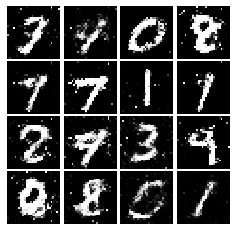

In [10]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: 0.5654, G:0.4677


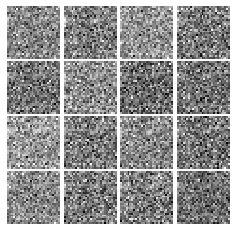


Iter: 250, D: 0.09979, G:0.3712


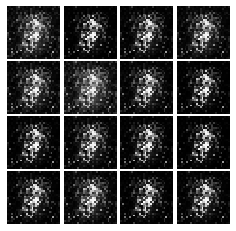


EPOCH:  2
Iter: 500, D: 0.1231, G:0.4848


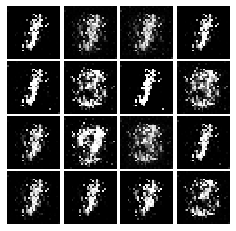


Iter: 750, D: 0.2262, G:0.2536


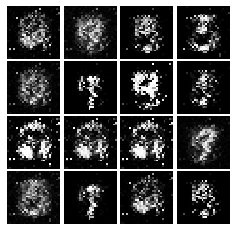


EPOCH:  3
Iter: 1000, D: 0.1688, G:0.3762


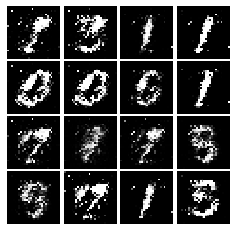


Iter: 1250, D: 0.1769, G:0.3181


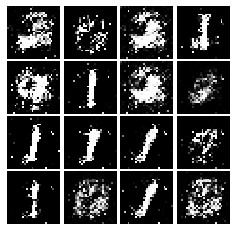


EPOCH:  4
Iter: 1500, D: 0.2842, G:0.1716


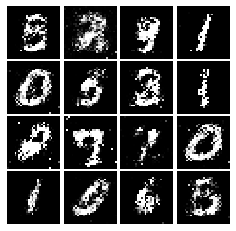


Iter: 1750, D: 0.2128, G:0.1849


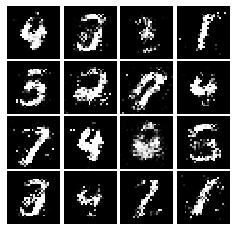


EPOCH:  5
Iter: 2000, D: 0.2026, G:0.1633


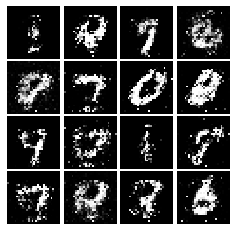


Iter: 2250, D: 0.2329, G:0.2289


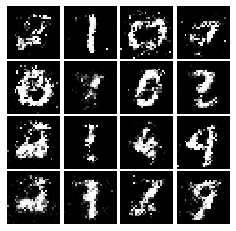


EPOCH:  6
Iter: 2500, D: 0.2152, G:0.1636


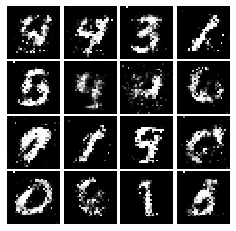


Iter: 2750, D: 0.224, G:0.1689


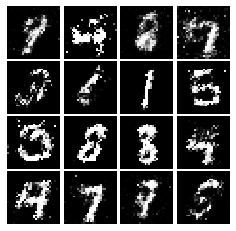


EPOCH:  7
Iter: 3000, D: 0.2092, G:0.1757


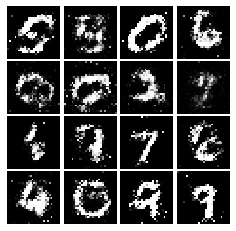


Iter: 3250, D: 0.2246, G:0.2167


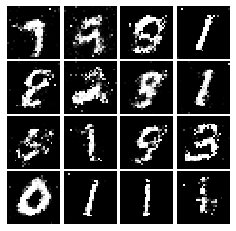


EPOCH:  8
Iter: 3500, D: 0.2398, G:0.1873


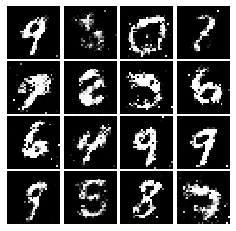


EPOCH:  9
Iter: 3750, D: 0.216, G:0.1732


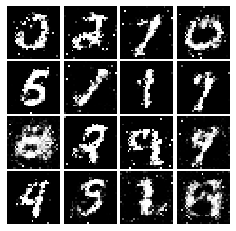


Iter: 4000, D: 0.224, G:0.1612


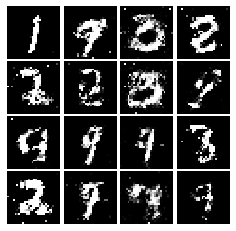


EPOCH:  10
Iter: 4250, D: 0.2226, G:0.1655


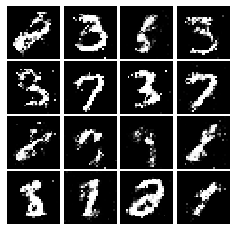


Iter: 4500, D: 0.2274, G:0.1468


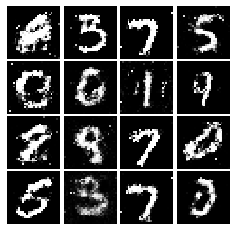

In [ ]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)